In [1]:
from pytrends.request import TrendReq
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
import matplotlib.dates as mdates

In [2]:
#Keyword search
keyword_1 = input('First keyword: ')

First keyword: iot


In [3]:
#Print keyword_1
print(keyword_1)

iot


In [4]:
#Whethor need to compare other keyword
question_1 = input('Do you want to add another keyword? [Yes/No]: ')

Do you want to add another keyword? [Yes/No]: yes


In [5]:
#Print question_1
print(question_1)

yes


In [6]:
if question_1.upper() == 'YES':
    keyword_2 = input('Second keyword: ')
else:
    keyword_2 = ''

Second keyword: devops


In [7]:
if question_1.upper() == 'YES':
    question_2 = input('Do you want to add another keyword? [Yes/No]: ')
    

Do you want to add another keyword? [Yes/No]: yes


In [8]:
if question_2.upper() == 'YES':
    keyword_3 = input('Third keyword: ')
else:
    keyword_3 = ''

Third keyword: 5g


In [9]:
user_kw_list = [keyword_1]
if question_1.upper() == 'YES':
    user_kw_list.append(keyword_2)
if question_2.upper() == 'YES':
    user_kw_list.append(keyword_3)

In [10]:
print(user_kw_list)

['iot', 'devops', '5g']


In [11]:
user_cat = 0 
user_timeframe = 'today 5-y' 
user_geo = ''

In [12]:
#Select timeframe
ans = input ('Would you like to focus the research on a specific timeframe? (default is last 5 years) (Yes/No): ')


Would you like to focus the research on a specific timeframe? (default is last 5 years) (Yes/No): yes


In [13]:
#Timeframe
if ans.upper() == "YES":
    timeframe_list = ('Here is the list of the timeframes available: \n all: all \n last 5 years: 5 years \n last 4 years: 4 years \n last 3 years: 3 years \n last 2 years: 2 years \n last 1 year: 1 year')
    print (timeframe_list)
    user_timeframe = input ('Please indicate the timeframe of focus in the format specified in the list (e.g. "3 years"): ')
        

Here is the list of the timeframes available: 
 all: all 
 last 5 years: 5 years 
 last 4 years: 4 years 
 last 3 years: 3 years 
 last 2 years: 2 years 
 last 1 year: 1 year
Please indicate the timeframe of focus in the format specified in the list (e.g. "3 years"): 1 year


In [14]:
#Timeframe set
acceptable_timeframe = ['5 years', '4 years', '3 years', '2 years', '1 year']
if user_timeframe in acceptable_timeframe:
    print ('Timeframe set')
else:
    user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')    
    if user_timeframe in acceptable_timeframe:
        print ('Timeframe set')
    else:
        user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')
        if user_timeframe in acceptable_timeframe:
            print ('Timeframe set')
        else:
            user_timeframe = input ('Timeframe not valid, please indicate the right timeframe: ')

Timeframe set


In [15]:
#Reset numyears
if user_timeframe == "5 years":
    numyears = 5
elif user_timeframe == "4 years":
    numyears = 4
elif user_timeframe == "3 years":
    numyears = 3
elif user_timeframe == "2 years":
    numyears = 2
else:
    numyears = 1

In [16]:
numdays = 7
numweeks = 52
total_time_range = numdays * numweeks * numyears
end_date= date.today()
today_date = date.today()
end_date = today_date
begin_date = end_date - datetime.timedelta(days = total_time_range-7)
user_timeframe = begin_date.strftime('%Y-%m-%d')+' '+end_date.strftime('%Y-%m-%d')
print(user_timeframe)

2019-03-18 2020-03-09


In [17]:
#Reset gro
ans = input ('Would you like to focus the research on a specific country? (default is World) (Yes/No): ')


Would you like to focus the research on a specific country? (default is World) (Yes/No): yes


In [18]:
if ans.upper() == 'YES':
 user_geo = input ('Please indicate country of focus (first two letters in capitals, e.g. United States is US): ')
print(user_geo)

Please indicate country of focus (first two letters in capitals, e.g. United States is US): TW
TW


In [19]:
pytrend = TrendReq()

In [20]:
#Pytrend
pytrend.build_payload(kw_list=user_kw_list, cat=user_cat, timeframe=user_timeframe, geo=user_geo)

In [21]:
interest_over_time_df = pytrend.interest_over_time()
print(interest_over_time_df.head())

            iot  devops  5g isPartial
date                                 
2019-03-24   11       2  42     False
2019-03-31    9       2  59     False
2019-04-07   10       2  61     False
2019-04-14   11       3  70     False
2019-04-21   12       2  58     False


In [22]:
#Output data
interest_over_time_df.to_csv("interest_over_time.csv", index=True)

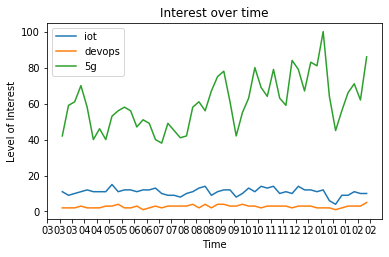

In [26]:
# x axis values: dates of the last n years (n defined above by the user)
numdays = 7
numweeks = 52
datelist = [begin_date]
for index in range (0, numweeks*numyears-3):
    datelist.append(datelist[index] + datetime.timedelta(days = numdays)) 
x_axis = datelist
# Plot into a chart 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(0,14*numyears))
plt.gcf().autofmt_xdate()
plt.plot (x_axis, interest_over_time_df.iloc[:,0], label = '{}'.format(keyword_1))
if question_1.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,1], label = '{}'.format(keyword_2))
if question_2.upper() == "YES":
    plt.plot (x_axis, interest_over_time_df.iloc[:,2], label = '{}'.format(keyword_3))
plt.xticks(rotation=1)
plt.xlabel('Time')
plt.ylabel('Level of Interest')
plt.title('Interest over time')
plt.legend()
plt.show()